In [ ]:
#Week 1 Assignment : Data Visualization Project - Ana Rita Santos 
#Goal: analyzing the relationship between fertility and life expectancy worldwide for the time period between 2000 and 2015
#Step 1: Load, inspect and format data 
#Step 2: Static Analysis (2000 vs 2015) with Boxplots 
#Step 4: Dynamic Analysis with Animation (variable evolution across the years between 2000 and 2015) 

In [37]:
#####STEP 1: LOAD,INSPECT AND FORMAT  DATA 

import pandas as pd

fert = pd.read_csv('/home/rita/Documents/spiced/spiced-projects/convex_capers_student_code/week01/data/gapminder_total_fertility.csv', index_col=0)
fert.head(3)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
life = pd.read_excel('/home/rita/Documents/spiced/spiced-projects/convex_capers_student_code/week01/data/gapminder_lifeexpectancy.xlsx', index_col=0
)
life.shape

(260, 217)

In [47]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [55]:
life.columns

Float64Index([1800.0, 1801.0, 1802.0, 1803.0, 1804.0, 1805.0, 1806.0, 1807.0,
              1808.0, 1809.0,
              ...
              2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
              2015.0, 2016.0],
             dtype='float64', length=217)

In [39]:
fert.columns = fert.columns.astype(int)
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [40]:
fert.index.name = 'country'
fert.head(2)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47


In [41]:
fert = fert.reset_index()
fert.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


In [42]:
fert = fert.melt(id_vars ='country', var_name='year',value_name='fertility_rate')
fert.head()

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99


In [43]:
life.index
life.index.name = 'country'
life.head(2)

,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,1809.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72


In [44]:
life = life.reset_index()
life = life.melt(id_vars='country', var_name='year', value_name='life expectancy')
life.head(10)

,country,year,life expectancy
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,28.21
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,35.40
4,Algeria,1800.0,28.82
5,American Samoa,1800.0,NaN
6,Andorra,1800.0,NaN
7,Angola,1800.0,26.98
8,Anguilla,1800.0,NaN
9,Antigua and Barbuda,1800.0,33.54


In [93]:
pop = pd.read_excel('/home/rita/Documents/spiced/spiced-projects/convex_capers_student_code/week01/data/gapminder_population.xlsx', index_col = 0
)
pop.head(3)

,1800.0,1810.0,1820.0,1830.0,1840.0,1850.0,1860.0,1870.0,1880.0,1890.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
pop.columns

Float64Index([1800.0, 1810.0, 1820.0, 1830.0, 1840.0, 1850.0, 1860.0, 1870.0,
              1880.0, 1890.0, 1900.0, 1910.0, 1920.0, 1930.0, 1940.0, 1950.0,
              1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0,
              1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0,
              1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0,
              1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0,
              1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0,
              1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0,
              1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0,
              2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
              2015.0],
             dtype='float64')

In [94]:
pop.columns = pop.columns.astype(int)
pop.index.name = 'country'
pop = pop.reset_index()
pop = pop.melt(id_vars ='country', var_name='year',value_name='Total_Population')

pop.head(3)

,country,year,Total_Population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN


In [99]:
df = fert.merge(pop)
df.tail(3)

,country,year,fertility_rate,Total_Population
20976,Zimbabwe,2015,3.35,15602751.0
20977,Åland,2015,NaN,NaN
20978,Åland,2015,NaN,NaN


In [100]:
df = df.merge(life)
df.head(5)

,country,year,fertility_rate,Total_Population,life expectancy
0,Abkhazia,1800,NaN,NaN,NaN
1,Afghanistan,1800,7.00,3280000.0,28.21
2,Akrotiri and Dhekelia,1800,NaN,NaN,NaN
3,Albania,1800,4.60,410445.0,35.40
4,Algeria,1800,6.99,2503218.0,28.82


In [116]:
cont = pd.read_csv('/home/rita/Documents/spiced/spiced-projects/convex_capers_student_code/week01/data/continents.csv', sep =';')
cont.head(3)

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin


In [117]:
df = df.merge(cont)
df.head(5)

,country,year,fertility_rate,Total_Population,life expectancy,continent
0,Afghanistan,1800,7.0,3280000.0,28.21,Asia
1,Afghanistan,1810,7.0,3280000.0,28.11,Asia
2,Afghanistan,1820,7.0,3323519.0,28.01,Asia
3,Afghanistan,1830,7.0,3448982.0,27.90,Asia
4,Afghanistan,1840,7.0,3625022.0,27.80,Asia


In [ ]:
#Step 2: Static Analysis (2000 vs 2015) with Boxplots 

In [208]:
df_00_15 = df[(df['year'] == 2000) | (df['year'] == 2015)]
df_00_15.head(5)


,country,year,fertility_rate,Total_Population,life expectancy,continent
65,Afghanistan,2000,7.73,19701940.0,50.1,Asia
80,Afghanistan,2015,4.47,32526562.0,53.8,Asia
146,Albania,2000,2.38,3121965.0,74.7,Europe
161,Albania,2015,1.78,2896679.0,78.0,Europe
227,Algeria,2000,2.51,31183658.0,73.3,Africa


<AxesSubplot:xlabel='continent', ylabel='fertility_rate'>

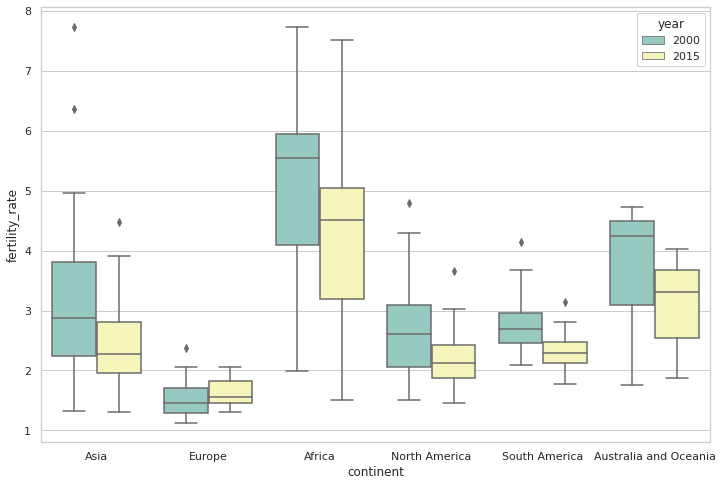

In [222]:
    plt.figure(figsize=(12,8))
    sns.boxplot(x='continent', y="fertility_rate", hue="year",
                 data=df_00_15, palette="Set3")

<AxesSubplot:xlabel='continent', ylabel='life expectancy'>

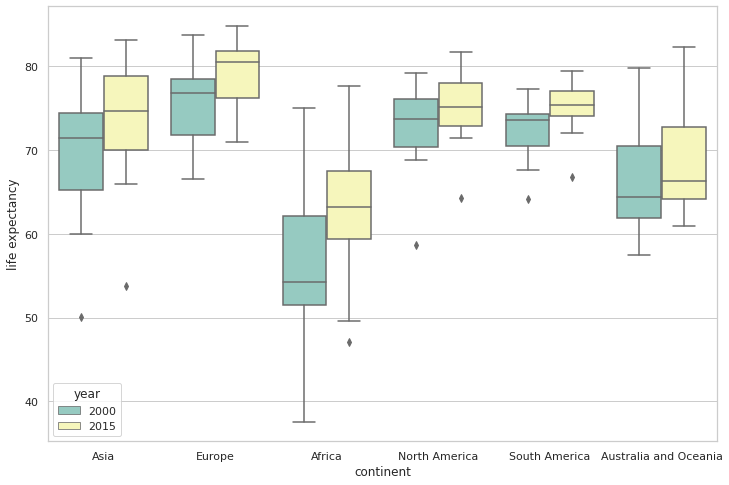

In [221]:
    plt.figure(figsize=(12,8))
    sns.boxplot(x='continent', y="life expectancy", hue="year",
                 data=df_00_15, palette="Set3")

In [218]:
df_00_15.groupby('year').describe()

fertility_rate                                                         \
              count      mean       std   min     25%    50%     75%   max   
year                                                                         
2000          166.0  3.299096  1.741171  1.13  1.7825  2.825  4.4700  7.73   
2015          166.0  2.773916  1.334923  1.30  1.7925  2.265  3.6675  7.51   

     Total_Population                ...                            \
                count          mean  ...         75%           max   
year                                 ...                             
2000            175.0  3.267742e+07  ...  18966122.5  1.269975e+09   
2015            175.0  3.928818e+07  ...  27121054.0  1.376049e+09   

     life expectancy                                                     
               count       mean       std   min   25%   50%   75%   max  
year                                                                     
2000           169.0  67.715976  9.798538  37.6  61.7  70.7  74.8  83.7  
2015           169.0  72.005917  8.092749  47.1  65.9  74.1  78.2  84.8  

[2 rows x 24 columns]

In [220]:
df_00_15.groupby(['continent', 'year']).describe()

fertility_rate                                    \
                                    count      mean       std   min     25%   
continent             year                                                    
Africa                2000           49.0  5.123878  1.488009  1.99  4.0900   
                      2015           49.0  4.247959  1.353108  1.50  3.2000   
Asia                  2000           37.0  3.159730  1.302236  1.32  2.2400   
                      2015           37.0  2.403514  0.734825  1.30  1.9600   
Australia and Oceania 2000            9.0  3.673333  1.129602  1.76  3.0900   
                      2015            9.0  3.103333  0.809228  1.88  2.5400   
Europe                2000           40.0  1.522500  0.291545  1.13  1.2925   
                      2015           40.0  1.627750  0.210049  1.31  1.4575   
North America         2000           19.0  2.733158  0.920127  1.51  2.0600   
                      2015           19.0  2.238421  0.531855  1.45  1.8700   
South America         2000           12.0  2.815000  0.591185  2.09  2.4500   
                      2015           12.0  2.318333  0.387623  1.78  2.1200   

                                                Total_Population  \
                              50%     75%   max            count   
continent             year                                         
Africa                2000  5.550  5.9400  7.73             49.0   
                      2015  4.510  5.0400  7.51             49.0   
Asia                  2000  2.870  3.8100  7.73             37.0   
                      2015  2.270  2.8000  4.47             37.0   
Australia and Oceania 2000  4.250  4.5000  4.72             13.0   
                      2015  3.310  3.6800  4.03             13.0   
Europe                2000  1.455  1.7125  2.38             44.0   
                      2015  1.550  1.8225  2.06             44.0   
North America         2000  2.600  3.0900  4.80             20.0   
                      2015  2.130  2.4200  3.66             20.0   
South America         2000  2.690  2.9650  4.14             12.0   
                      2015  2.285  2.4775  3.14             12.0   

                                          ...                             \
                                    mean  ...          75%           max   
continent             year                ...                              
Africa                2000  1.483446e+07  ...  15927713.00  1.228767e+08   
                      2015  2.141768e+07  ...  25021974.00  1.822020e+08   
Asia                  2000  9.560414e+07  ...  63240157.00  1.269975e+09   
                      2015  1.134098e+08  ...  78665830.00  1.376049e+09   
Australia and Oceania 2000  2.322759e+06  ...    811223.00  1.910725e+07   
                      2015  2.951035e+06  ...    892145.00  2.396897e+07   
Europe                2000  1.339066e+07  ...  10270920.50  8.189592e+07   
                      2015  1.375192e+07  ...  10646043.75  8.068854e+07   
North America         2000  2.426457e+07  ...   9201164.00  2.828957e+08   
                      2015  2.840898e+07  ...  10880690.75  3.217736e+08   
South America         2000  2.913580e+07  ...  28700519.50  1.757864e+08   
                      2015  3.484797e+07  ...  34386691.25  2.078475e+08   

                           life expectancy                                     \
                                     count       mean       std   min     25%   
continent             year                                                      
Africa                2000            49.0  56.702041  8.685296  37.6  51.500   
                      2015            49.0  63.410204  6.760740  47.1  59.400   
Asia                  2000            37.0  69.851351  6.477766  50.1  65.200   
                      2015            37.0  73.791892  6.034041  53.8  70.000   
Australia and Oceania 2000            10.0  66.900000  7.589906  57.5  61.900   
                      2015     

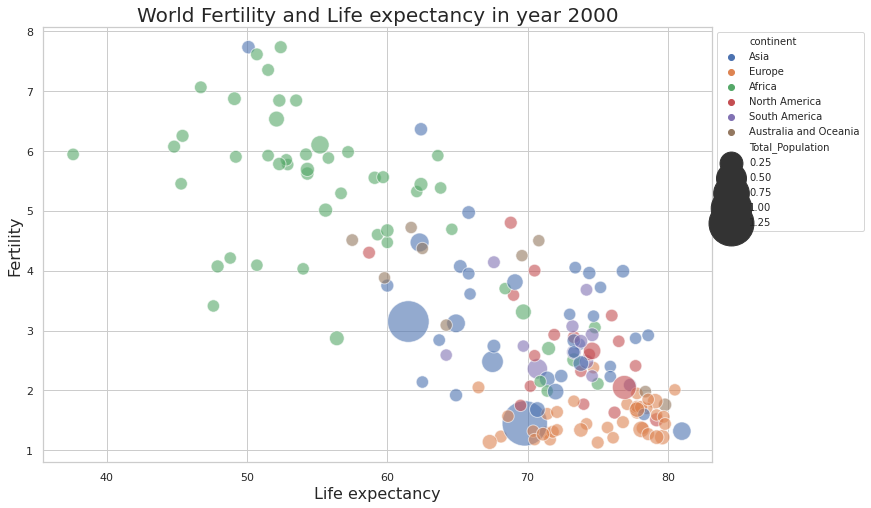

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt



df_subset = df.loc[df['year'] == 2000]

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='life expectancy', y='fertility_rate',
                size ='Total_Population',
                sizes=(150,2050),
                hue='continent',
                #legend = False,
                data=df_subset, 
                alpha=0.6)
plt.title('World Fertility and Life expectancy in year 2000', fontsize=20)
plt.xlabel('Life expectancy', fontsize=16)
plt.ylabel('Fertility', fontsize=16)

# Locate the legend outside of the plot
plt.legend(bbox_to_anchor=(1 , 1), loc='upper left', fontsize=10)



In [130]:
df.head(5)

,country,year,fertility_rate,Total_Population,life expectancy,continent
0,Afghanistan,1800,7.0,3280000.0,28.21,Asia
1,Afghanistan,1810,7.0,3280000.0,28.11,Asia
2,Afghanistan,1820,7.0,3323519.0,28.01,Asia
3,Afghanistan,1830,7.0,3448982.0,27.90,Asia
4,Afghanistan,1840,7.0,3625022.0,27.80,Asia


In [ ]:
#STEP 4: Dynamic Analysis with Animation (variables evolution across the year) 

In [ ]:
df_subset = df[(df['year'] >= 2000)]
df_subset.head(5)


In [190]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


In [ ]:

#Note: this code was written based on the following tutorials:
#https://www.python-graph-gallery.com/340-scatterplot-animation
#https://www.python-graph-gallery.com/341-python-gapminder-animation

dpi=96

for i in df_subset['year']:
    plt.ioff()
    
    fig = plt.figure(figsize=(680/dpi, 480/dpi), dpi=dpi)
        
    df_subset = df.loc[df['year'] == i]


    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12,8))
    ax = sns.scatterplot(x='life expectancy', y='fertility_rate',
                    size ='Total_Population',
                    sizes=(150,2050),
                    hue='continent',
                    #legend = False,
                    data=df_subset, 
                    alpha=0.6)
    plt.title('Year '+str(i), fontsize=20)
    plt.xlabel('Life expectancy', fontsize=16)
    plt.ylabel('Fertility', fontsize=16)

    # Locate the legend outside of the plot
    plt.legend(bbox_to_anchor=(1 , 1), loc='upper left', fontsize=10)


    #plt.show()
    filename= 'lifeexp_'+str(i)+'.png'
    plt.savefig(fname=filename, dpi=96)
    plt.gca()
    plt.close(fig)
    plt.close('all')
    
        

In [ ]:
import imageio
        
images = []

for i in df_1960_2015['year']:
    filename = 'lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=20)